I have simplified the original code while ensuring that it produces the same outputs and insights. The changes include replacing deprecated methods with updated ones (e.g., sns.distplot replaced by sns.histplot), limiting the scatterplot matrix (sns.pairplot) to a smaller subset of features for clarity, and consolidating exploratory print statements to provide a concise yet comprehensive overview of the data. The revised code remains efficient and easier to read without compromising its functionality or the insights it generates.

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

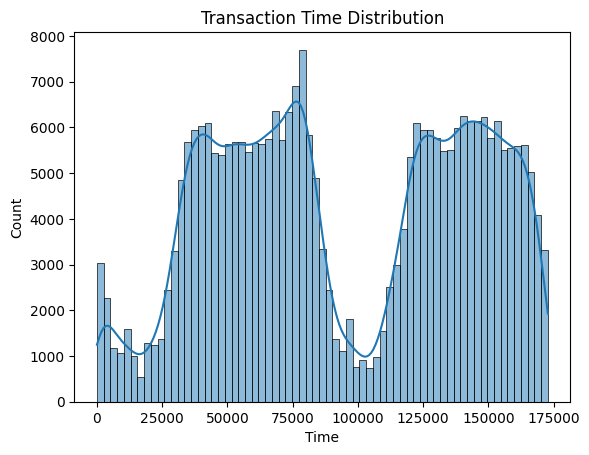

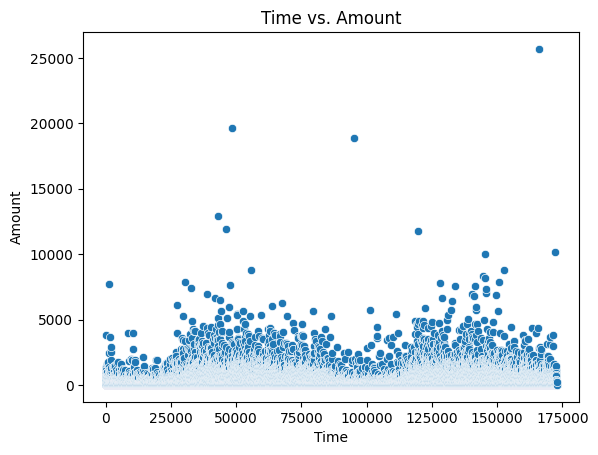

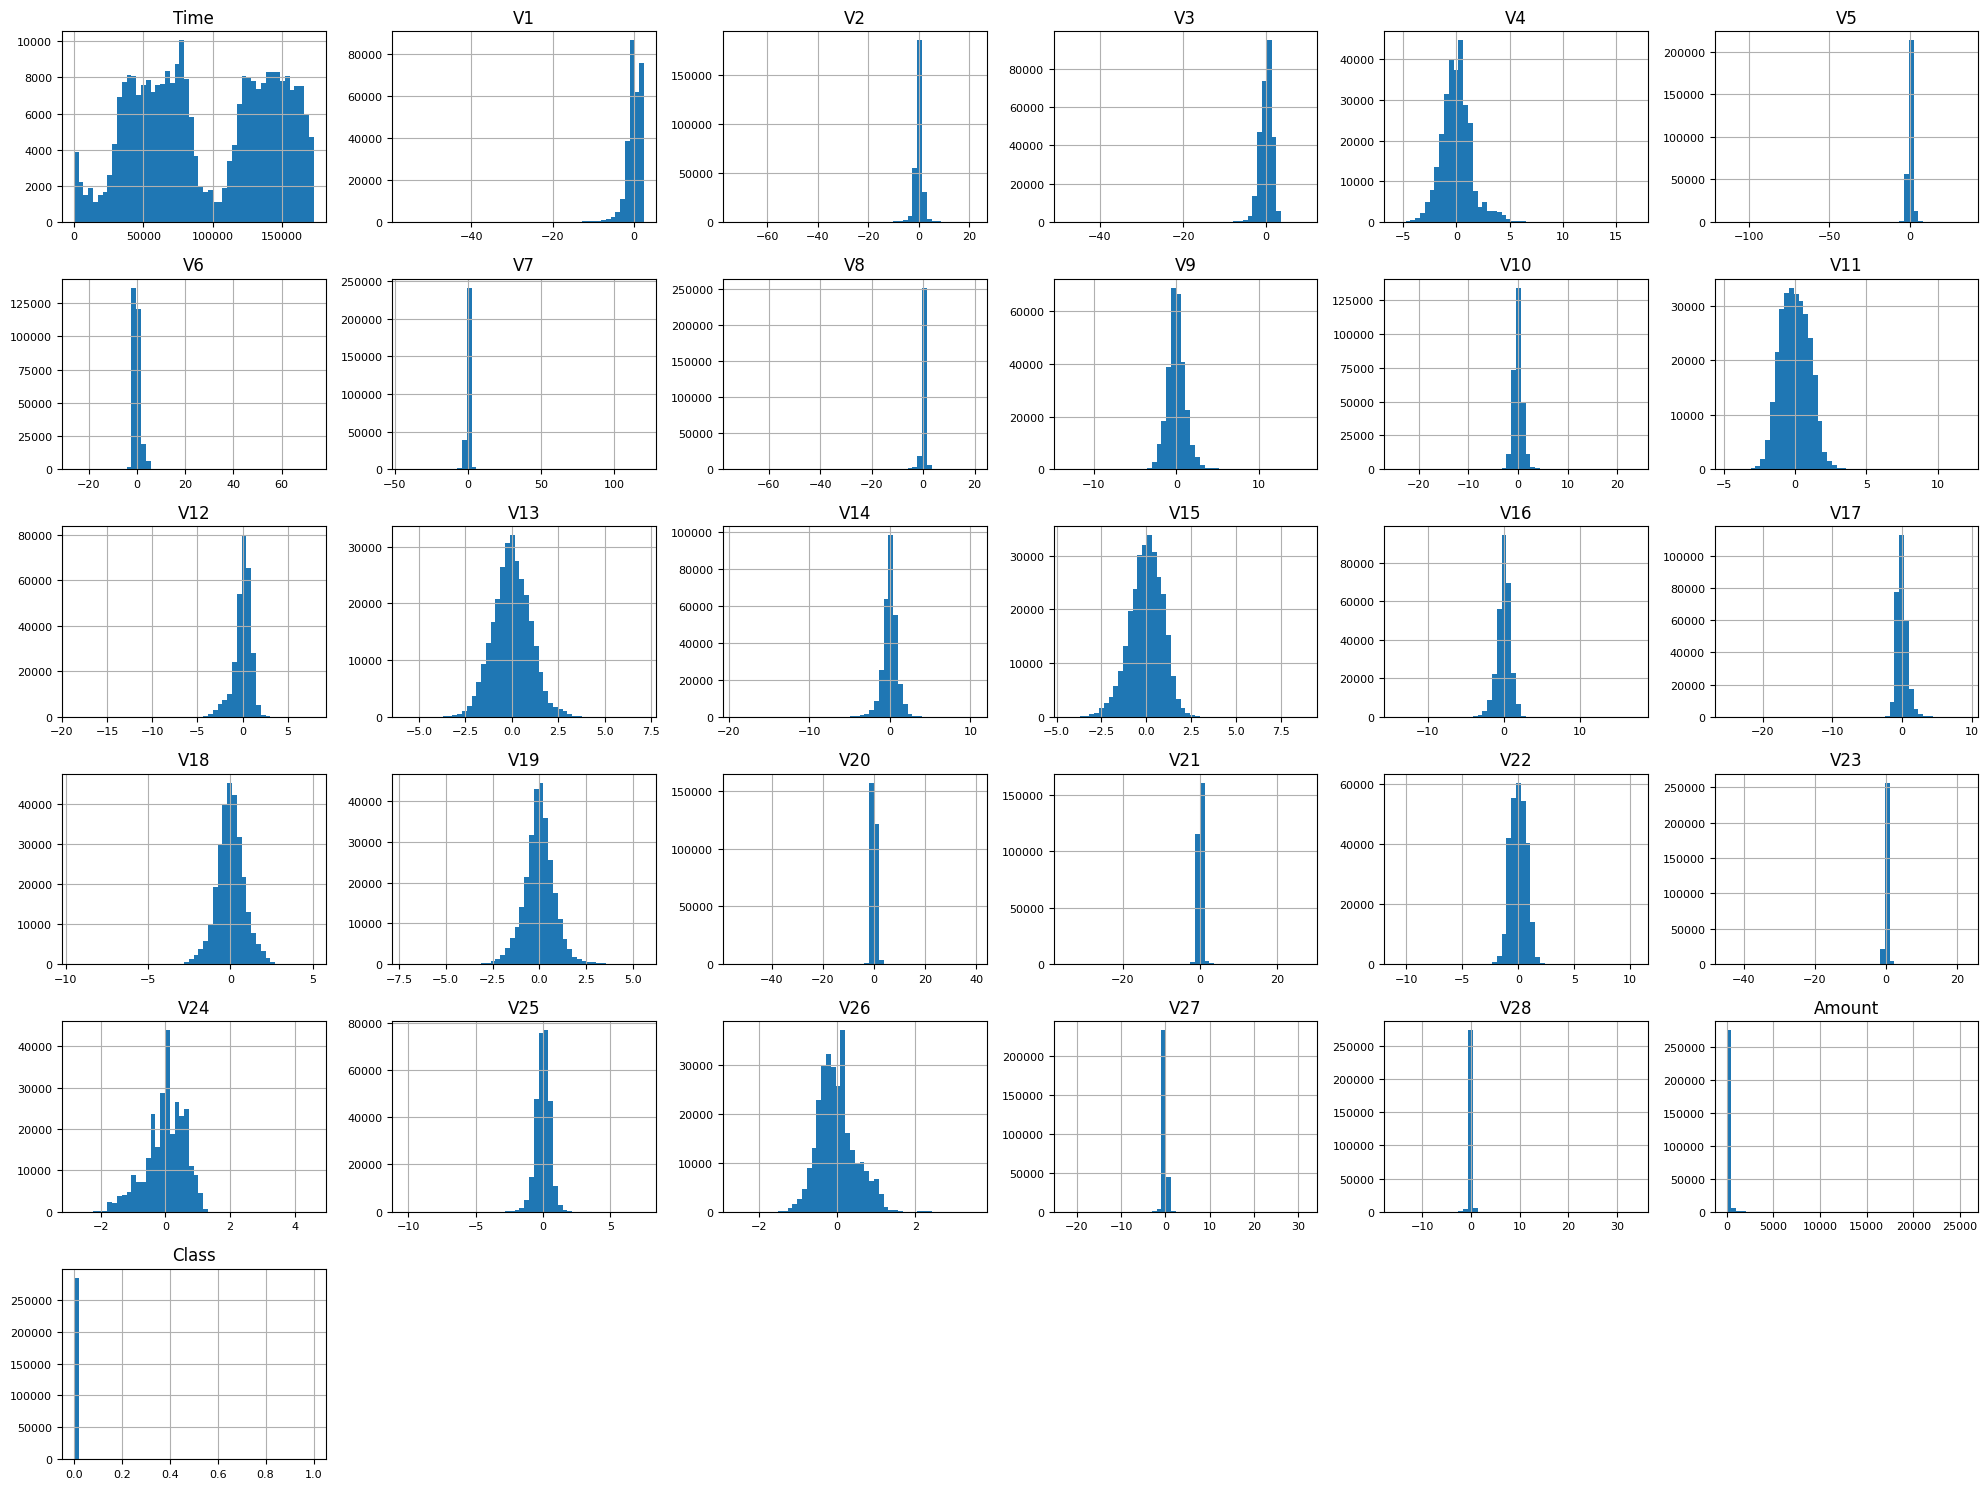

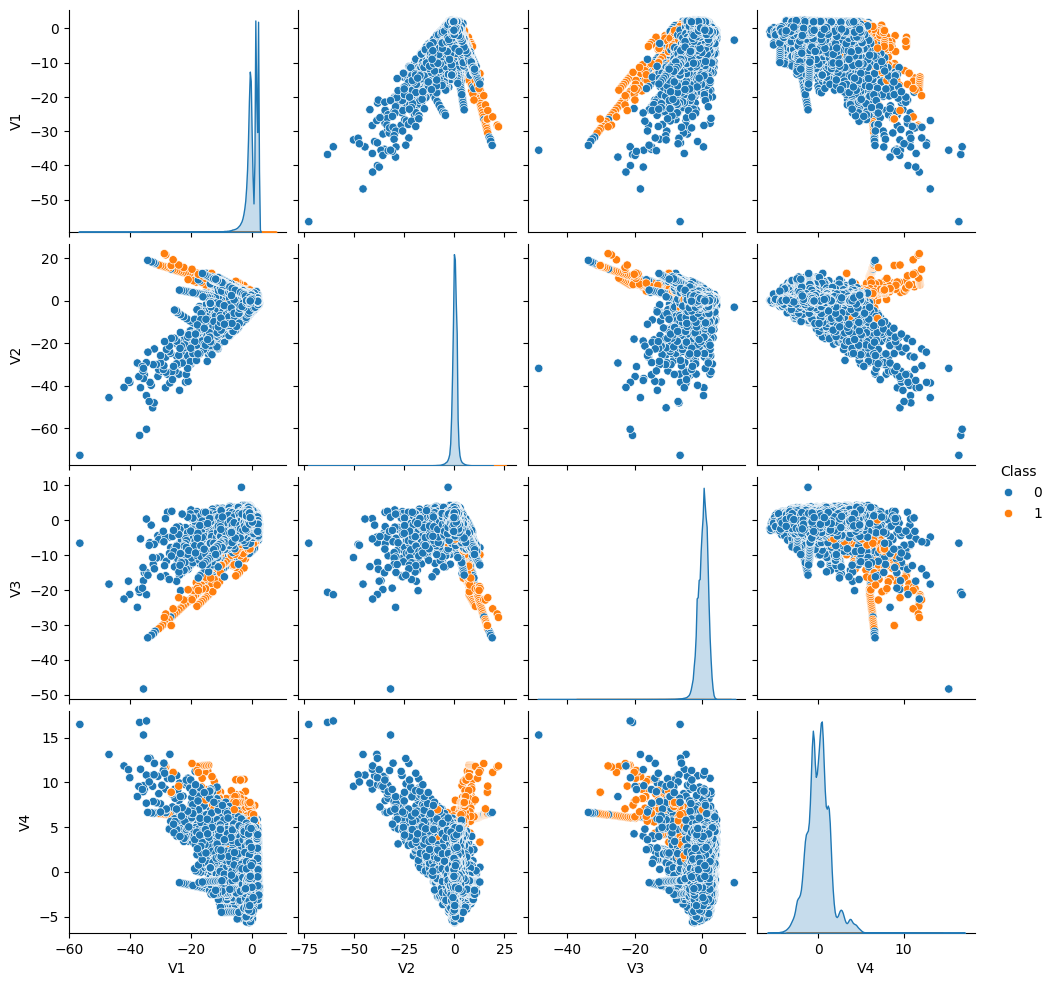

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("creditcard.csv")

# Quick overview of data
print(data.shape)  # Dataset dimensions
print(data.info())  # Data types and missing values
print(data.describe())  # Descriptive statistics

# Class distribution
class_counts = data['Class'].value_counts()
print(class_counts)
print(f"Percentage of fraud cases: {class_counts[1] / len(data) * 100:.5f}%")

# Plot transaction time distribution
sns.histplot(data['Time'], kde=True)
plt.title('Transaction Time Distribution')
plt.show()

# Relationship between time and amount
sns.scatterplot(x='Time', y='Amount', data=data)
plt.title('Time vs. Amount')
plt.show()

# Histogram for all features
data.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

# Pairplot for a small subset of features
sns.pairplot(data[['V1', 'V2', 'V3', 'V4', 'Class']], hue='Class')
plt.show()



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)

# Performance metrics
print("SVM Performance:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Performance:
[[85075   220]
 [   49    99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.31      0.67      0.42       148

    accuracy                           1.00     85443
   macro avg       0.65      0.83      0.71     85443
weighted avg       1.00      1.00      1.00     85443



In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

# Performance metrics
print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
[[85292     3]
 [   43   105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Explanation of Results: SVM vs. Random Forest
1. Performance Overview
The two models, Support Vector Machine (SVM) and Random Forest (RF), were evaluated on the same fraud detection dataset. Below is a summary of the key performance metrics:

Metric	SVM	Random Forest
Precision (Class 1)	0.31	0.97
Recall (Class 1)	0.67	0.71
F1-Score (Class 1)	0.42	0.82
Accuracy	1.00	1.00

2. Observations

Accuracy:
Both models achieved very high accuracy due to the imbalanced nature of the dataset, where non-fraudulent transactions dominate.
Accuracy alone is not a reliable metric in imbalanced datasets because it can be skewed by the majority class.

Precision:
SVM (Precision: 0.31): Out of all the transactions predicted as fraud, only 31% were actually fraudulent. This indicates a high false positive rate.
Random Forest (Precision: 0.97): RF demonstrated a much higher precision, meaning it made significantly fewer false positive predictions.

Recall:
SVM (Recall: 0.67): SVM detected 67% of the fraudulent transactions, showing it captures more fraud cases compared to its precision.
Random Forest (Recall: 0.71): RF slightly outperformed SVM, detecting 71% of fraud cases, with better precision.

F1-Score:
SVM (F1-Score: 0.42): This low score reflects the trade-off between its moderate recall and poor precision.
Random Forest (F1-Score: 0.82): A higher F1-score suggests RF balances precision and recall better than SVM.

3. Strengths and Weaknesses of Each Model

Support Vector Machine (SVM):
Strengths:
Handles non-linear boundaries effectively.
Good recall, meaning it identifies a larger proportion of fraud cases.
Weaknesses:
Poor precision leads to many false positives, which could strain resources in a real-world scenario.
May require tuning of the kernel, regularization, and class weight parameters for optimal performance.

Random Forest (RF):
Strengths:
High precision ensures fewer false positives.
Balances performance well, as reflected by its F1-score.
Weaknesses:
Slightly lower recall compared to SVM means it misses some fraud cases.
Computationally heavier due to ensemble learning.

4. Overall Insights
Random Forest outperforms SVM in this context, especially in terms of precision and F1-score, making it a better choice for fraud detection where minimizing false positives is critical.
However, SVM's higher recall shows it could be useful if the goal is to capture as many fraud cases as possible, even at the expense of more false positives.